<a href="https://www.kaggle.com/code/sonalanand/daily-practise-15-april-pivot-table?scriptVersionId=234140318" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📊 Daily Pandas Practice 15/04 – Pivot Table Edition  
Dataset: Healthcare Spending vs Life Expectancy (1970–2020)

In today’s practice, I’ll focus on exploring real-world data using one of pandas’ most powerful tools: `pivot_table`.

The dataset covers 5 countries (Germany, France, Great Britain, Japan, and USA) from 1970 to 2020, and includes:
- **Year** – from 1970 to 2020  
- **Country** – name of the country  
- **Spending_USD** – healthcare spending per capita  
- **Life_Expectancy** – average life expectancy in years

Some questions will also include visualisations (bar plots, heatmaps, lineplots) to make insights clearer.

---

## ✅ Pivot Table Questions Covered:

1. Show the average life expectancy per country using a pivot table  
2. Compare total healthcare spending by country across all years  
3. Show average life expectancy per decade by country  
4. Identify the country with the highest spending per year  
5. Find the average spending and life expectancy per country using multiple values in pivot  
6. Visualise average life expectancy per country using a bar plot  
7. Create a pivot table showing year-wise life expectancy trend for each country (and visualise)  
8. Plot a heatmap showing spending per country per decade using a pivot table

---

Let’s start 👇


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('healthexp')
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


✅ Q1: Show the average life expectancy per country using a pivot table

In [2]:

pd.pivot_table(df, index = 'Country', values = 'Life_Expectancy', aggfunc = 'mean')



,Life_Expectancy
Country,
Canada,78.706818
France,79.565714
Germany,76.726000
Great Britain,77.620930
Japan,79.554902
USA,75.843137


✅ Q2: Compare total healthcare spending by country across all years

In [3]:


pd.pivot_table(df, index = 'Country', columns = 'Year', values = 'Spending_USD', aggfunc = 'sum')



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Canada,NaN,313.391,NaN,NaN,NaN,NaN,543.337,NaN,NaN,692.269,...,4228.962,4336.249,4428.753,4536.810,4635.285,5044.275,5150.470,5308.356,5189.721,5828.324
France,192.143,NaN,NaN,NaN,NaN,363.610,NaN,NaN,NaN,NaN,...,4161.698,4299.434,4544.964,4626.679,4667.156,4928.128,5005.756,5099.306,5167.839,5468.418
Germany,252.311,298.251,337.364,384.541,452.744,532.481,591.098,647.352,729.457,800.703,...,4566.678,4745.546,4951.677,5151.709,5295.975,5669.064,5970.163,6281.840,6407.928,6938.983
Great Britain,123.993,134.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3495.652,3614.131,3667.636,3758.935,3805.820,3960.141,4059.125,4189.708,4385.463,5018.700
Japan,150.437,163.854,185.390,205.778,242.018,284.269,303.725,340.628,392.577,452.931,...,3740.756,3970.765,4308.252,4328.364,4515.556,4295.858,4412.852,4554.276,4610.794,4665.641
USA,326.961,357.988,397.097,439.302,495.114,560.750,638.851,726.241,808.884,908.963,...,8079.467,8346.064,8519.620,8925.879,9355.118,9717.649,10046.472,10451.386,10855.517,11859.179


✅ Q3: Show average life expectancy per decade by country

In [4]:

df['Decade'] = df['Year'].apply(lambda x : (x//10)*10)


pd.pivot_table(df, index = 'Country', columns = 'Decade', values = 'Life_Expectancy', aggfunc = 'mean')


Decade,1970,1980,1990,2000,2010,2020
Country,,,,,,
Canada,73.90,76.18,78.030000,79.99,81.77,81.7
France,72.60,74.85,77.980000,80.30,82.48,82.3
Germany,71.61,74.54,76.933333,79.28,80.85,81.1
Great Britain,71.90,74.53,76.650000,79.04,81.13,80.4
Japan,74.15,77.53,79.790000,82.11,83.68,84.7
USA,72.30,74.59,75.940000,77.54,78.73,77.0


✅ Q4: Identify the country with the highest spending per year

In [5]:


country_highest_spend = pd.pivot_table(df, index = 'Year', columns = 'Country', values = 'Spending_USD', aggfunc = 'sum')




country_highest_spend.idxmax(axis = 1)




Year
1970    USA
1971    USA
1972    USA
1973    USA
1974    USA
1975    USA
1976    USA
1977    USA
1978    USA
1979    USA
1980    USA
1981    USA
1982    USA
1983    USA
1984    USA
1985    USA
1986    USA
1987    USA
1988    USA
1989    USA
1990    USA
1991    USA
1992    USA
1993    USA
1994    USA
1995    USA
1996    USA
1997    USA
1998    USA
1999    USA
2000    USA
2001    USA
2002    USA
2003    USA
2004    USA
2005    USA
2006    USA
2007    USA
2008    USA
2009    USA
2010    USA
2011    USA
2012    USA
2013    USA
2014    USA
2015    USA
2016    USA
2017    USA
2018    USA
2019    USA
2020    USA
dtype: object

✅ Q5: Find the average spending and life expectancy per country using multiple values in pivot

In [6]:



pd.pivot_table(df, index = 'Country', values = ['Spending_USD','Life_Expectancy'], aggfunc = 'mean')




,Life_Expectancy,Spending_USD
Country,,
Canada,78.706818,2685.778341
France,79.565714,3045.145057
Germany,76.726000,2667.280200
Great Britain,77.620930,2034.192465
Japan,79.554902,1860.257902
USA,75.843137,4388.570529


✅ Q6: Visualise average life expectancy per country using a bar plot

In [7]:


# Step 1: Creating the pivot table

life_exp_avg = pd.pivot_table(df, index='Country', values='Life_Expectancy', aggfunc='mean').reset_index()

life_exp_avg



,Country,Life_Expectancy
0,Canada,78.706818
1,France,79.565714
2,Germany,76.726000
3,Great Britain,77.620930
4,Japan,79.554902
5,USA,75.843137


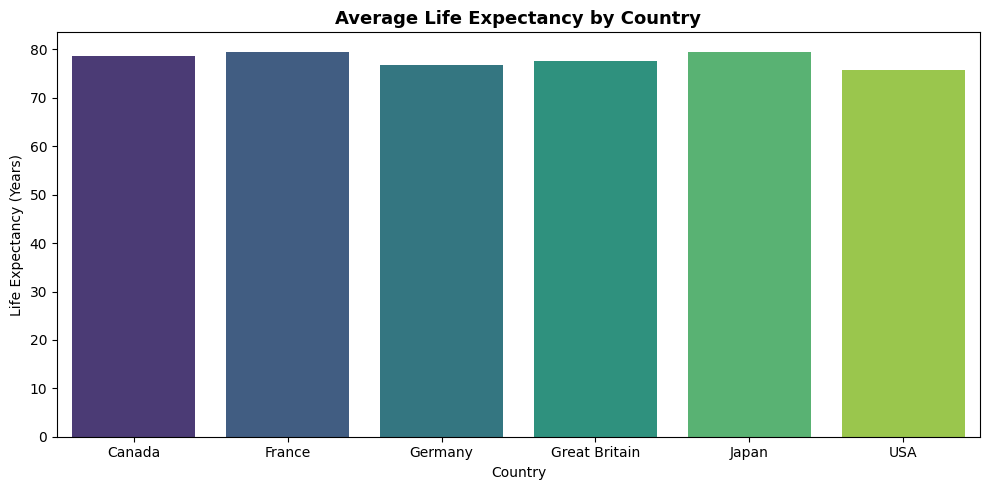

In [8]:


# Step 2: Plotting the bar chart


plt.figure(figsize=(10, 5))


sns.barplot(data=life_exp_avg, x='Country', y='Life_Expectancy', palette='viridis')


plt.title('Average Life Expectancy by Country', fontsize=13, fontweight='bold')
plt.ylabel('Life Expectancy (Years)')
plt.xlabel('Country')


plt.tight_layout()
plt.show()



✅ Q7: Create a pivot showing year-wise life expectancy trend for each country (and visualise it)


In [9]:

# Step 1: Creating the pivot table

yearly_life_exp = pd.pivot_table(df, index='Year', columns = 'Country', values='Life_Expectancy', aggfunc='mean')

yearly_life_exp


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Country,Canada,France,Germany,Great Britain,Japan,USA
Year,,,,,,
1970,NaN,72.2,70.6,71.9,72.0,70.9
1971,72.8,NaN,70.8,71.9,72.9,71.2
1972,NaN,NaN,71.0,NaN,73.2,71.2
1973,NaN,NaN,71.3,NaN,73.4,71.4
1974,NaN,NaN,71.5,NaN,73.7,72.0
1975,NaN,73.0,71.4,NaN,74.3,72.7
1976,73.8,NaN,71.8,NaN,74.8,72.9
1977,NaN,NaN,72.5,NaN,75.3,73.3
1978,NaN,NaN,72.4,NaN,75.7,73.5


<Figure size 1200x600 with 0 Axes>

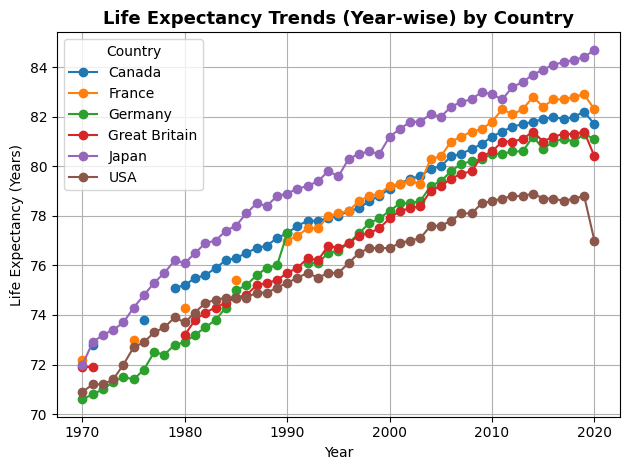

In [10]:

# Step 2: Plotting the trend line

plt.figure(figsize=(12, 6))

yearly_life_exp.plot(marker='o')

plt.title('Life Expectancy Trends (Year-wise) by Country', fontsize=13, fontweight='bold')
plt.ylabel('Life Expectancy (Years)')
plt.xlabel('Year')


plt.grid(True)


plt.tight_layout()
plt.show()


✅ Q8: Plot a heatmap showing spending per country per decade using a pivot table

In [11]:


# Step 1: Creating the pivot table

spending_heatmap = pd.pivot_table(df, index='Country', columns='Decade', values='Spending_USD', aggfunc='mean')
spending_heatmap



Decade,1970,1980,1990,2000,2010,2020
Country,,,,,,
Canada,516.332333,1177.8433,1985.096500,3215.3118,4701.4410,5828.324
France,277.876500,830.4855,1949.900700,3284.9903,4654.6025,5468.418
Germany,502.630200,1264.6231,2284.674778,3472.6771,5346.3650,6938.983
Great Britain,129.082500,548.1916,1163.949700,2669.3677,3837.8321,5018.700
Japan,272.160700,785.0034,1387.972000,2384.9488,4190.6663,4665.641
USA,566.015100,1677.9259,3536.906200,6197.3021,9217.6425,11859.179


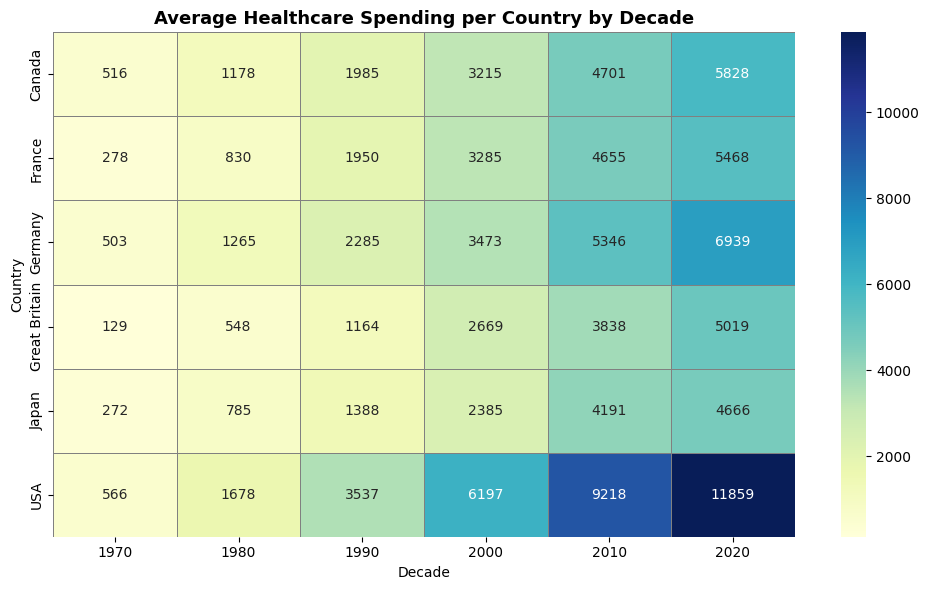

In [12]:

# Step 3: Plotting the heatmap

plt.figure(figsize=(10, 6))


sns.heatmap(spending_heatmap, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, linecolor='gray')


plt.title('Average Healthcare Spending per Country by Decade', fontsize=13, fontweight='bold')
plt.xlabel('Decade')
plt.ylabel('Country')


plt.tight_layout()
plt.show()



In [13]:
df

,Year,Country,Spending_USD,Life_Expectancy,Decade
0,1970,Germany,252.311,70.6,1970
1,1970,France,192.143,72.2,1970
2,1970,Great Britain,123.993,71.9,1970
3,1970,Japan,150.437,72.0,1970
4,1970,USA,326.961,70.9,1970
...,...,...,...,...,...
269,2020,Germany,6938.983,81.1,2020
270,2020,France,5468.418,82.3,2020
271,2020,Great Britain,5018.700,80.4,2020
272,2020,Japan,4665.641,84.7,2020
